# Stars That Leave
Lets find out which stars leave the system by the end of 18th snapshot and leave them out of our analysis

In [3]:
from os import listdir

files =[i for i in listdir("../data") if '.csv' in i]
files

['c_0200.csv',
 'c_0700.csv',
 'c_1500.csv',
 'c_0500.csv',
 'c_1100.csv',
 'c_1700.csv',
 'c_0800.csv',
 'c_1300.csv',
 'c_0600.csv',
 'c_0000.csv',
 'c_1800.csv',
 'c_1000.csv',
 'c_0300.csv',
 'c_0900.csv',
 'c_0400.csv',
 'c_1600.csv',
 'c_1400.csv',
 'c_0100.csv']

In [5]:
import numpy as np
snapshots = [np.genfromtxt("../data/"+file, delimiter=',', dtype=None, names=True) for  file in files] 
len(snapshots)

18

So there are a total of 18 snapshots, each snapshot has about 64000 different stars in it.

In [8]:
snapshots[0]['id']

array([43837, 51649,     4, ..., 63998, 63999, 64000])

In order to figure out which stars leave at every snapshot, all we have to do is perform a set difference operation on the current and previous snapshots over id

In [10]:
stars_that_leave = []
for i in range(1,len(snapshots)):
    print("*"*8)
    print("Snapshot: ", i)
    print("Current Number of stars: ", snapshots[i].shape[0])
    tmp = set(list(snapshots[i]['id']))-set(list(snapshots[i-1]['id']))
    if len(tmp)!=0:
        print("Stars That left: ", tmp)
    stars_that_leave = stars_that_leave + list(tmp)

********
Snapshot:  1
Current Number of stars:  63987
********
Snapshot:  2
Current Number of stars:  63977
********
Snapshot:  3
Current Number of stars:  63990
Stars That left:  {34497, 10466, 35526, 54442, 26765, 47597, 19600, 46544, 22770, 59636, 46586, 6621, 63358}
********
Snapshot:  4
Current Number of stars:  63983
********
Snapshot:  5
Current Number of stars:  63973
********
Snapshot:  6
Current Number of stars:  63985
Stars That left:  {10466, 49827, 50170, 35526, 54442, 59117, 29582, 19600, 22770, 59636, 46586, 63358}
********
Snapshot:  7
Current Number of stars:  63981
********
Snapshot:  8
Current Number of stars:  63989
Stars That left:  {34497, 54442, 47597, 26765, 19600, 46544, 46586, 63358}
********
Snapshot:  9
Current Number of stars:  64000
Stars That left:  {5856, 23650, 57698, 1797, 50534, 53000, 3150, 57839, 26771, 38199, 6621}
********
Snapshot:  10
Current Number of stars:  63970
********
Snapshot:  11
Current Number of stars:  63983
Stars That left:  {10466,

In [11]:
print(len(set(stars_that_leave)))

30


So there are 30 stars that'll leave or go in and out of the cluster. Lets analyze their behavior over time.

Populating the interactive namespace from numpy and matplotlib


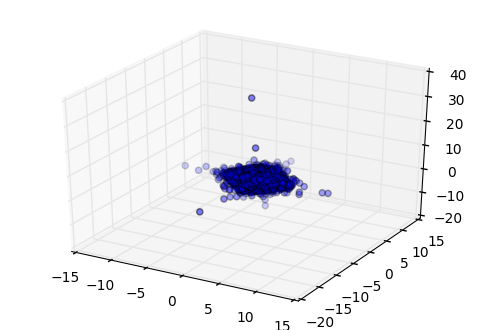

In [ ]:
%pylab inline
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(snapshots[0]['x'], snapshots[0]['y'], snapshots[0]['z'])

def update_plot(i, snapshots, scat):
    s = snapshots[i]
#     scat.set_3d_properties(s['x'],'x')
#     scat.set_3d_properties(s['y'],'y')
    scat.set_offsets([s['x'],s['y']])
    scat.set_3d_properties(s['z'],'z')
    return scat,
# help(scat.set_array)
ani = animation.FuncAnimation(fig, update_plot, frames=range(18), fargs=(snapshots, scat))
plt.show()
ani.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [ ]:
color_data = np.random.random((100, 10))
color_data

In [ ]:
def main():
    numframes = 100
    numpoints = 10
    color_data = np.random.random((numframes, numpoints))
    x, y, z = np.random.random((3, numpoints))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scat = ax.scatter(x, y, z)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(color_data, scat))
    plt.show()

def update_plot(i, data, scat):
    scat.set_3d_properties(data[i],'x')
    scat.set_3d_properties(data[i],'y')
    scat.set_3d_properties(data[i],'z')
#     scat.set_array(data[i])
    return scat,

main()